# Vanilla MNIST neural network

## Environment setting

Importing libraries

In [1]:
import os
import numpy as np
import json
from keras.datasets import mnist
from keras.callbacks import TensorBoard, ModelCheckpoint
from preprocess import *
from utils import *
from model import *
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix, f1_score
from keras.utils import plot_model
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
from keras import backend as K

/home/tuche-kaki/.local/lib/python2.7/site-packages/h5py/__init__.py:36: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from ._conv import register_converters as _register_converters
/home/tuche-kaki/.local/lib/python2.7/site-packages/h5py/__init__.py:45: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import h5a, h5d, h5ds, h5f, h5fd, h5g, h5r, h5s, h5t, h5p, h5z
/home/tuche-kaki/.local/lib/python2.7/site-packages/h5py/_hl/group.py:22: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .. import h5g, h5i, h5o, h5r, h5t, h5l, h5p
Using TensorFlow backend.
/home/tuche-kaki/.local/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/tuche-kaki

Setting plotly

In [2]:
py.init_notebook_mode(connected=True)
K.clear_session()

Defining global variables

In [3]:
data_status = ['train', 'validation', 'test']
categories = np.arange(10).tolist()

Defining output directory structure

In [4]:
path_structure = \
    {
        'preprocess': [],
        'model': [['stats']],
        'visualisation': [data_status, categories]
    }
paths = create_paths_from_dictionnary(path_structure)

## Preprocess and data visualisation

Loading splitting and preprocessing data

In [5]:
data = dict()
(data['x_train'], data['y_train']), (data['x_test'], data['y_test']) = mnist.load_data()
(data['x_train'], data['y_train']), (data['x_validation'], data['y_validation']) = data_split(data['x_train'],
                                                                                              data['y_train'])
data_to_categories(data, list(data))
save_data(paths['preprocess'], data)

Vizualizing the first 100 images of training, validation and test set

In [6]:
visualize_data(paths, data, data_status, notebook=True)

train sample number 0 (ground truth value = 5) :


train sample number 1 (ground truth value = 0) :


train sample number 2 (ground truth value = 4) :


train sample number 3 (ground truth value = 1) :


train sample number 4 (ground truth value = 9) :


train sample number 5 (ground truth value = 2) :


train sample number 6 (ground truth value = 1) :


train sample number 7 (ground truth value = 3) :


train sample number 8 (ground truth value = 1) :


train sample number 9 (ground truth value = 4) :


train sample number 10 (ground truth value = 3) :


train sample number 11 (ground truth value = 5) :


train sample number 12 (ground truth value = 3) :


train sample number 13 (ground truth value = 6) :


train sample number 14 (ground truth value = 1) :


train sample number 15 (ground truth value = 7) :


train sample number 16 (ground truth value = 2) :


train sample number 17 (ground truth value = 8) :


train sample number 18 (ground truth value = 6) :


train sample number 19 (ground truth value = 9) :


train sample number 20 (ground truth value = 4) :


train sample number 21 (ground truth value = 0) :


train sample number 22 (ground truth value = 9) :


train sample number 23 (ground truth value = 1) :


train sample number 24 (ground truth value = 1) :


train sample number 25 (ground truth value = 2) :


train sample number 26 (ground truth value = 4) :


train sample number 27 (ground truth value = 3) :


train sample number 28 (ground truth value = 2) :


train sample number 29 (ground truth value = 7) :


train sample number 30 (ground truth value = 3) :


train sample number 31 (ground truth value = 8) :


train sample number 32 (ground truth value = 6) :


train sample number 33 (ground truth value = 9) :


train sample number 34 (ground truth value = 0) :


train sample number 35 (ground truth value = 5) :


train sample number 36 (ground truth value = 6) :


train sample number 37 (ground truth value = 0) :


train sample number 38 (ground truth value = 7) :


train sample number 39 (ground truth value = 6) :


train sample number 40 (ground truth value = 1) :


train sample number 41 (ground truth value = 8) :


train sample number 42 (ground truth value = 7) :


train sample number 43 (ground truth value = 9) :


train sample number 44 (ground truth value = 3) :


train sample number 45 (ground truth value = 9) :


train sample number 46 (ground truth value = 8) :


train sample number 47 (ground truth value = 5) :


train sample number 48 (ground truth value = 9) :


train sample number 49 (ground truth value = 3) :


train sample number 50 (ground truth value = 3) :


train sample number 51 (ground truth value = 0) :


train sample number 52 (ground truth value = 7) :


train sample number 53 (ground truth value = 4) :


train sample number 54 (ground truth value = 9) :


train sample number 55 (ground truth value = 8) :


train sample number 56 (ground truth value = 0) :


train sample number 57 (ground truth value = 9) :


train sample number 58 (ground truth value = 4) :


train sample number 59 (ground truth value = 1) :


train sample number 60 (ground truth value = 4) :


train sample number 61 (ground truth value = 4) :


train sample number 62 (ground truth value = 6) :


train sample number 63 (ground truth value = 0) :


train sample number 64 (ground truth value = 4) :


train sample number 65 (ground truth value = 5) :


train sample number 66 (ground truth value = 6) :


train sample number 67 (ground truth value = 1) :


train sample number 68 (ground truth value = 0) :


train sample number 69 (ground truth value = 0) :


train sample number 70 (ground truth value = 1) :


train sample number 71 (ground truth value = 7) :


train sample number 72 (ground truth value = 1) :


train sample number 73 (ground truth value = 6) :


train sample number 74 (ground truth value = 3) :


train sample number 75 (ground truth value = 0) :


train sample number 76 (ground truth value = 2) :


train sample number 77 (ground truth value = 1) :


train sample number 78 (ground truth value = 1) :


train sample number 79 (ground truth value = 7) :


train sample number 80 (ground truth value = 9) :


train sample number 81 (ground truth value = 0) :


train sample number 82 (ground truth value = 2) :


train sample number 83 (ground truth value = 6) :


train sample number 84 (ground truth value = 7) :


train sample number 85 (ground truth value = 8) :


train sample number 86 (ground truth value = 3) :


train sample number 87 (ground truth value = 9) :


train sample number 88 (ground truth value = 0) :


train sample number 89 (ground truth value = 4) :


train sample number 90 (ground truth value = 6) :


train sample number 91 (ground truth value = 7) :


train sample number 92 (ground truth value = 4) :


train sample number 93 (ground truth value = 6) :


train sample number 94 (ground truth value = 8) :


train sample number 95 (ground truth value = 0) :


train sample number 96 (ground truth value = 7) :


train sample number 97 (ground truth value = 8) :


train sample number 98 (ground truth value = 3) :


train sample number 99 (ground truth value = 1) :


validation sample number 0 (ground truth value = 4) :


validation sample number 1 (ground truth value = 7) :


validation sample number 2 (ground truth value = 8) :


validation sample number 3 (ground truth value = 8) :


validation sample number 4 (ground truth value = 5) :


validation sample number 5 (ground truth value = 6) :


validation sample number 6 (ground truth value = 6) :


validation sample number 7 (ground truth value = 8) :


validation sample number 8 (ground truth value = 2) :


validation sample number 9 (ground truth value = 2) :


validation sample number 10 (ground truth value = 7) :


validation sample number 11 (ground truth value = 8) :


validation sample number 12 (ground truth value = 0) :


validation sample number 13 (ground truth value = 4) :


validation sample number 14 (ground truth value = 3) :


validation sample number 15 (ground truth value = 4) :


validation sample number 16 (ground truth value = 5) :


validation sample number 17 (ground truth value = 2) :


validation sample number 18 (ground truth value = 4) :


validation sample number 19 (ground truth value = 2) :


validation sample number 20 (ground truth value = 4) :


validation sample number 21 (ground truth value = 8) :


validation sample number 22 (ground truth value = 1) :


validation sample number 23 (ground truth value = 0) :


validation sample number 24 (ground truth value = 1) :


validation sample number 25 (ground truth value = 0) :


validation sample number 26 (ground truth value = 0) :


validation sample number 27 (ground truth value = 1) :


validation sample number 28 (ground truth value = 8) :


validation sample number 29 (ground truth value = 2) :


validation sample number 30 (ground truth value = 9) :


validation sample number 31 (ground truth value = 3) :


validation sample number 32 (ground truth value = 6) :


validation sample number 33 (ground truth value = 6) :


validation sample number 34 (ground truth value = 2) :


validation sample number 35 (ground truth value = 7) :


validation sample number 36 (ground truth value = 9) :


validation sample number 37 (ground truth value = 8) :


validation sample number 38 (ground truth value = 3) :


validation sample number 39 (ground truth value = 0) :


validation sample number 40 (ground truth value = 1) :


validation sample number 41 (ground truth value = 1) :


validation sample number 42 (ground truth value = 9) :


validation sample number 43 (ground truth value = 2) :


validation sample number 44 (ground truth value = 1) :


validation sample number 45 (ground truth value = 3) :


validation sample number 46 (ground truth value = 5) :


validation sample number 47 (ground truth value = 4) :


validation sample number 48 (ground truth value = 4) :


validation sample number 49 (ground truth value = 5) :


validation sample number 50 (ground truth value = 7) :


validation sample number 51 (ground truth value = 6) :


validation sample number 52 (ground truth value = 6) :


validation sample number 53 (ground truth value = 7) :


validation sample number 54 (ground truth value = 6) :


validation sample number 55 (ground truth value = 8) :


validation sample number 56 (ground truth value = 4) :


validation sample number 57 (ground truth value = 9) :


validation sample number 58 (ground truth value = 5) :


validation sample number 59 (ground truth value = 0) :


validation sample number 60 (ground truth value = 8) :


validation sample number 61 (ground truth value = 1) :


validation sample number 62 (ground truth value = 8) :


validation sample number 63 (ground truth value = 2) :


validation sample number 64 (ground truth value = 3) :


validation sample number 65 (ground truth value = 3) :


validation sample number 66 (ground truth value = 6) :


validation sample number 67 (ground truth value = 4) :


validation sample number 68 (ground truth value = 4) :


validation sample number 69 (ground truth value = 5) :


validation sample number 70 (ground truth value = 2) :


validation sample number 71 (ground truth value = 6) :


validation sample number 72 (ground truth value = 9) :


validation sample number 73 (ground truth value = 7) :


validation sample number 74 (ground truth value = 1) :


validation sample number 75 (ground truth value = 8) :


validation sample number 76 (ground truth value = 3) :


validation sample number 77 (ground truth value = 9) :


validation sample number 78 (ground truth value = 5) :


validation sample number 79 (ground truth value = 1) :


validation sample number 80 (ground truth value = 7) :


validation sample number 81 (ground truth value = 8) :


validation sample number 82 (ground truth value = 6) :


validation sample number 83 (ground truth value = 6) :


validation sample number 84 (ground truth value = 4) :


validation sample number 85 (ground truth value = 1) :


validation sample number 86 (ground truth value = 6) :


validation sample number 87 (ground truth value = 4) :


validation sample number 88 (ground truth value = 3) :


validation sample number 89 (ground truth value = 9) :


validation sample number 90 (ground truth value = 6) :


validation sample number 91 (ground truth value = 3) :


validation sample number 92 (ground truth value = 8) :


validation sample number 93 (ground truth value = 7) :


validation sample number 94 (ground truth value = 5) :


validation sample number 95 (ground truth value = 7) :


validation sample number 96 (ground truth value = 7) :


validation sample number 97 (ground truth value = 9) :


validation sample number 98 (ground truth value = 7) :


validation sample number 99 (ground truth value = 1) :


test sample number 0 (ground truth value = 7) :


test sample number 1 (ground truth value = 2) :


test sample number 2 (ground truth value = 1) :


test sample number 3 (ground truth value = 0) :


test sample number 4 (ground truth value = 4) :


test sample number 5 (ground truth value = 1) :


test sample number 6 (ground truth value = 4) :


test sample number 7 (ground truth value = 9) :


test sample number 8 (ground truth value = 5) :


test sample number 9 (ground truth value = 9) :


test sample number 10 (ground truth value = 0) :


test sample number 11 (ground truth value = 6) :


test sample number 12 (ground truth value = 9) :


test sample number 13 (ground truth value = 0) :


test sample number 14 (ground truth value = 1) :


test sample number 15 (ground truth value = 5) :


test sample number 16 (ground truth value = 9) :


test sample number 17 (ground truth value = 7) :


test sample number 18 (ground truth value = 3) :


test sample number 19 (ground truth value = 4) :


test sample number 20 (ground truth value = 9) :


test sample number 21 (ground truth value = 6) :


test sample number 22 (ground truth value = 6) :


test sample number 23 (ground truth value = 5) :


test sample number 24 (ground truth value = 4) :


test sample number 25 (ground truth value = 0) :


test sample number 26 (ground truth value = 7) :


test sample number 27 (ground truth value = 4) :


test sample number 28 (ground truth value = 0) :


test sample number 29 (ground truth value = 1) :


test sample number 30 (ground truth value = 3) :


test sample number 31 (ground truth value = 1) :


test sample number 32 (ground truth value = 3) :


test sample number 33 (ground truth value = 4) :


test sample number 34 (ground truth value = 7) :


test sample number 35 (ground truth value = 2) :


test sample number 36 (ground truth value = 7) :


test sample number 37 (ground truth value = 1) :


test sample number 38 (ground truth value = 2) :


test sample number 39 (ground truth value = 1) :


test sample number 40 (ground truth value = 1) :


test sample number 41 (ground truth value = 7) :


test sample number 42 (ground truth value = 4) :


test sample number 43 (ground truth value = 2) :


test sample number 44 (ground truth value = 3) :


test sample number 45 (ground truth value = 5) :


test sample number 46 (ground truth value = 1) :


test sample number 47 (ground truth value = 2) :


test sample number 48 (ground truth value = 4) :


test sample number 49 (ground truth value = 4) :


test sample number 50 (ground truth value = 6) :


test sample number 51 (ground truth value = 3) :


test sample number 52 (ground truth value = 5) :


test sample number 53 (ground truth value = 5) :


test sample number 54 (ground truth value = 6) :


test sample number 55 (ground truth value = 0) :


test sample number 56 (ground truth value = 4) :


test sample number 57 (ground truth value = 1) :


test sample number 58 (ground truth value = 9) :


test sample number 59 (ground truth value = 5) :


test sample number 60 (ground truth value = 7) :


test sample number 61 (ground truth value = 8) :


test sample number 62 (ground truth value = 9) :


test sample number 63 (ground truth value = 3) :


test sample number 64 (ground truth value = 7) :


test sample number 65 (ground truth value = 4) :


test sample number 66 (ground truth value = 6) :


test sample number 67 (ground truth value = 4) :


test sample number 68 (ground truth value = 3) :


test sample number 69 (ground truth value = 0) :


test sample number 70 (ground truth value = 7) :


test sample number 71 (ground truth value = 0) :


test sample number 72 (ground truth value = 2) :


test sample number 73 (ground truth value = 9) :


test sample number 74 (ground truth value = 1) :


test sample number 75 (ground truth value = 7) :


test sample number 76 (ground truth value = 3) :


test sample number 77 (ground truth value = 2) :


test sample number 78 (ground truth value = 9) :


test sample number 79 (ground truth value = 7) :


test sample number 80 (ground truth value = 7) :


test sample number 81 (ground truth value = 6) :


test sample number 82 (ground truth value = 2) :


test sample number 83 (ground truth value = 7) :


test sample number 84 (ground truth value = 8) :


test sample number 85 (ground truth value = 4) :


test sample number 86 (ground truth value = 7) :


test sample number 87 (ground truth value = 3) :


test sample number 88 (ground truth value = 6) :


test sample number 89 (ground truth value = 1) :


test sample number 90 (ground truth value = 3) :


test sample number 91 (ground truth value = 6) :


test sample number 92 (ground truth value = 9) :


test sample number 93 (ground truth value = 3) :


test sample number 94 (ground truth value = 1) :


test sample number 95 (ground truth value = 4) :


test sample number 96 (ground truth value = 1) :


test sample number 97 (ground truth value = 7) :


test sample number 98 (ground truth value = 6) :


test sample number 99 (ground truth value = 9) :


# Model definition and training

Defining hyperparameters and callbacks

In [8]:
hyperparameters =\
{
    'nb_inner_layers': 4,
    'nb_neurons_per_layers': 25,
    'activation_function': 'sigmoid',
    'batch_size': 50,
    'nb_epochs': 1000,
    'loss': 'mean_squared_error',
    'optimizer': 'sgd',
    'metrics': ['categorical_accuracy']
}

callbacks = [TensorBoard(log_dir=paths['model'], histogram_freq=1, batch_size=hyperparameters['batch_size']),
             ModelCheckpoint(os.path.join(paths['model'], 'weights.hdf5'))]

Creating model

In [10]:
model = create_model(hyperparameters)

Saving model

In [19]:
with open(os.path.join(paths['model'],'model.json'), 'w') as json_file:
    json_file.write(model.to_json())

Training model

In [20]:
model.fit(data['x_train'], data['y_train_gt'],
          batch_size=hyperparameters['batch_size'],
          epochs=hyperparameters['nb_epochs'],
          verbose=1,
          callbacks=callbacks,
          validation_data=(data['x_validation'], data['y_validation_gt']))

Train on 48000 samples, validate on 12000 samples
Epoch 1/1000
48000/48000 [==============================] - 3s 52us/step - loss: 0.1042 - categorical_accuracy: 0.1121 - val_loss: 0.0900 - val_categorical_accuracy: 0.1274
Epoch 2/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0899 - categorical_accuracy: 0.1236 - val_loss: 0.0899 - val_categorical_accuracy: 0.1152
Epoch 3/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0898 - categorical_accuracy: 0.1289 - val_loss: 0.0898 - val_categorical_accuracy: 0.1243
Epoch 4/1000
48000/48000 [==============================] - 2s 51us/step - loss: 0.0897 - categorical_accuracy: 0.1365 - val_loss: 0.0897 - val_categorical_accuracy: 0.1434
Epoch 5/1000
48000/48000 [==============================] - 2s 51us/step - loss: 0.0896 - categorical_accuracy: 0.1479 - val_loss: 0.0896 - val_categorical_accuracy: 0.1483
Epoch 6/1000
48000/48000 [==============================] - 3s 53us/step - loss: 0.08

Epoch 48/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0822 - categorical_accuracy: 0.4598 - val_loss: 0.0821 - val_categorical_accuracy: 0.4462
Epoch 49/1000
48000/48000 [==============================] - 2s 51us/step - loss: 0.0818 - categorical_accuracy: 0.4544 - val_loss: 0.0817 - val_categorical_accuracy: 0.4467
Epoch 50/1000
48000/48000 [==============================] - 3s 56us/step - loss: 0.0814 - categorical_accuracy: 0.4529 - val_loss: 0.0813 - val_categorical_accuracy: 0.4932
Epoch 51/1000
48000/48000 [==============================] - 2s 51us/step - loss: 0.0810 - categorical_accuracy: 0.4599 - val_loss: 0.0808 - val_categorical_accuracy: 0.4312
Epoch 52/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0806 - categorical_accuracy: 0.4509 - val_loss: 0.0804 - val_categorical_accuracy: 0.4513
Epoch 53/1000
48000/48000 [==============================] - 3s 55us/step - loss: 0.0802 - categorical_accuracy: 0.4513 - val_loss

Epoch 142/1000
48000/48000 [==============================] - 3s 59us/step - loss: 0.0620 - categorical_accuracy: 0.6591 - val_loss: 0.0623 - val_categorical_accuracy: 0.6737
Epoch 143/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0619 - categorical_accuracy: 0.6601 - val_loss: 0.0622 - val_categorical_accuracy: 0.6561
Epoch 144/1000
48000/48000 [==============================] - 3s 57us/step - loss: 0.0618 - categorical_accuracy: 0.6633 - val_loss: 0.0621 - val_categorical_accuracy: 0.6538
Epoch 145/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0617 - categorical_accuracy: 0.6611 - val_loss: 0.0620 - val_categorical_accuracy: 0.6542
Epoch 146/1000
48000/48000 [==============================] - 3s 55us/step - loss: 0.0616 - categorical_accuracy: 0.6671 - val_loss: 0.0619 - val_categorical_accuracy: 0.6542
Epoch 147/1000
48000/48000 [==============================] - 4s 78us/step - loss: 0.0614 - categorical_accuracy: 0.6662 - va

Epoch 189/1000
48000/48000 [==============================] - 2s 47us/step - loss: 0.0562 - categorical_accuracy: 0.7456 - val_loss: 0.0566 - val_categorical_accuracy: 0.7373
Epoch 190/1000
48000/48000 [==============================] - 2s 47us/step - loss: 0.0561 - categorical_accuracy: 0.7476 - val_loss: 0.0566 - val_categorical_accuracy: 0.7372
Epoch 191/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.0560 - categorical_accuracy: 0.7513 - val_loss: 0.0564 - val_categorical_accuracy: 0.7441
Epoch 192/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0559 - categorical_accuracy: 0.7498 - val_loss: 0.0564 - val_categorical_accuracy: 0.7353
Epoch 193/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.0558 - categorical_accuracy: 0.7495 - val_loss: 0.0563 - val_categorical_accuracy: 0.7379
Epoch 194/1000
48000/48000 [==============================] - 3s 52us/step - loss: 0.0557 - categorical_accuracy: 0.7486 - va

Epoch 236/1000
48000/48000 [==============================] - 2s 52us/step - loss: 0.0527 - categorical_accuracy: 0.7714 - val_loss: 0.0533 - val_categorical_accuracy: 0.7687
Epoch 237/1000
48000/48000 [==============================] - 3s 55us/step - loss: 0.0526 - categorical_accuracy: 0.7712 - val_loss: 0.0532 - val_categorical_accuracy: 0.7522
Epoch 238/1000
48000/48000 [==============================] - 3s 53us/step - loss: 0.0525 - categorical_accuracy: 0.7709 - val_loss: 0.0532 - val_categorical_accuracy: 0.7517
Epoch 239/1000
48000/48000 [==============================] - 3s 53us/step - loss: 0.0524 - categorical_accuracy: 0.7730 - val_loss: 0.0531 - val_categorical_accuracy: 0.7539
Epoch 240/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.0523 - categorical_accuracy: 0.7715 - val_loss: 0.0529 - val_categorical_accuracy: 0.7699
Epoch 241/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0522 - categorical_accuracy: 0.7722 - va

Epoch 283/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.0462 - categorical_accuracy: 0.8075 - val_loss: 0.0467 - val_categorical_accuracy: 0.8226
Epoch 284/1000
48000/48000 [==============================] - 2s 45us/step - loss: 0.0460 - categorical_accuracy: 0.8136 - val_loss: 0.0466 - val_categorical_accuracy: 0.8148
Epoch 285/1000
48000/48000 [==============================] - 2s 47us/step - loss: 0.0458 - categorical_accuracy: 0.8134 - val_loss: 0.0464 - val_categorical_accuracy: 0.8097
Epoch 286/1000
48000/48000 [==============================] - 2s 47us/step - loss: 0.0457 - categorical_accuracy: 0.8169 - val_loss: 0.0463 - val_categorical_accuracy: 0.8147
Epoch 287/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0455 - categorical_accuracy: 0.8184 - val_loss: 0.0461 - val_categorical_accuracy: 0.8147
Epoch 288/1000
48000/48000 [==============================] - 2s 45us/step - loss: 0.0454 - categorical_accuracy: 0.8220 - va

Epoch 330/1000
48000/48000 [==============================] - 2s 45us/step - loss: 0.0404 - categorical_accuracy: 0.8565 - val_loss: 0.0413 - val_categorical_accuracy: 0.8437
Epoch 331/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0403 - categorical_accuracy: 0.8558 - val_loss: 0.0412 - val_categorical_accuracy: 0.8447
Epoch 332/1000
48000/48000 [==============================] - 2s 45us/step - loss: 0.0403 - categorical_accuracy: 0.8565 - val_loss: 0.0412 - val_categorical_accuracy: 0.8496
Epoch 333/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0402 - categorical_accuracy: 0.8565 - val_loss: 0.0412 - val_categorical_accuracy: 0.8489
Epoch 334/1000
48000/48000 [==============================] - 2s 45us/step - loss: 0.0402 - categorical_accuracy: 0.8572 - val_loss: 0.0411 - val_categorical_accuracy: 0.8510
Epoch 335/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0401 - categorical_accuracy: 0.8573 - va

Epoch 377/1000
48000/48000 [==============================] - 3s 57us/step - loss: 0.0386 - categorical_accuracy: 0.8662 - val_loss: 0.0398 - val_categorical_accuracy: 0.8560
Epoch 378/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0386 - categorical_accuracy: 0.8660 - val_loss: 0.0398 - val_categorical_accuracy: 0.8562
Epoch 379/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0385 - categorical_accuracy: 0.8665 - val_loss: 0.0398 - val_categorical_accuracy: 0.8558
Epoch 380/1000
48000/48000 [==============================] - 2s 47us/step - loss: 0.0385 - categorical_accuracy: 0.8662 - val_loss: 0.0397 - val_categorical_accuracy: 0.8577
Epoch 381/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0385 - categorical_accuracy: 0.8672 - val_loss: 0.0397 - val_categorical_accuracy: 0.8571
Epoch 382/1000
48000/48000 [==============================] - 3s 56us/step - loss: 0.0384 - categorical_accuracy: 0.8669 - va

Epoch 424/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.0371 - categorical_accuracy: 0.8732 - val_loss: 0.0384 - val_categorical_accuracy: 0.8639
Epoch 425/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0370 - categorical_accuracy: 0.8739 - val_loss: 0.0384 - val_categorical_accuracy: 0.8602
Epoch 426/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0370 - categorical_accuracy: 0.8733 - val_loss: 0.0384 - val_categorical_accuracy: 0.8610
Epoch 427/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0370 - categorical_accuracy: 0.8738 - val_loss: 0.0383 - val_categorical_accuracy: 0.8644
Epoch 428/1000
48000/48000 [==============================] - 2s 47us/step - loss: 0.0369 - categorical_accuracy: 0.8739 - val_loss: 0.0383 - val_categorical_accuracy: 0.8620
Epoch 429/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0369 - categorical_accuracy: 0.8739 - va

Epoch 471/1000
48000/48000 [==============================] - 2s 51us/step - loss: 0.0345 - categorical_accuracy: 0.8804 - val_loss: 0.0359 - val_categorical_accuracy: 0.8652
Epoch 472/1000
48000/48000 [==============================] - 3s 52us/step - loss: 0.0344 - categorical_accuracy: 0.8807 - val_loss: 0.0359 - val_categorical_accuracy: 0.8669
Epoch 473/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.0343 - categorical_accuracy: 0.8814 - val_loss: 0.0358 - val_categorical_accuracy: 0.8644
Epoch 474/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0343 - categorical_accuracy: 0.8805 - val_loss: 0.0357 - val_categorical_accuracy: 0.8673
Epoch 475/1000
48000/48000 [==============================] - 3s 56us/step - loss: 0.0342 - categorical_accuracy: 0.8819 - val_loss: 0.0356 - val_categorical_accuracy: 0.8672
Epoch 476/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.0341 - categorical_accuracy: 0.8809 - va

Epoch 518/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0308 - categorical_accuracy: 0.8879 - val_loss: 0.0325 - val_categorical_accuracy: 0.8716
Epoch 519/1000
48000/48000 [==============================] - 2s 51us/step - loss: 0.0308 - categorical_accuracy: 0.8875 - val_loss: 0.0325 - val_categorical_accuracy: 0.8752
Epoch 520/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0307 - categorical_accuracy: 0.8882 - val_loss: 0.0324 - val_categorical_accuracy: 0.8712
Epoch 521/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0306 - categorical_accuracy: 0.8884 - val_loss: 0.0324 - val_categorical_accuracy: 0.8722
Epoch 522/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.0306 - categorical_accuracy: 0.8885 - val_loss: 0.0323 - val_categorical_accuracy: 0.8746
Epoch 523/1000
48000/48000 [==============================] - 3s 52us/step - loss: 0.0305 - categorical_accuracy: 0.8880 - va

Epoch 565/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0281 - categorical_accuracy: 0.8931 - val_loss: 0.0300 - val_categorical_accuracy: 0.8772
Epoch 566/1000
48000/48000 [==============================] - 2s 51us/step - loss: 0.0280 - categorical_accuracy: 0.8940 - val_loss: 0.0299 - val_categorical_accuracy: 0.8762
Epoch 567/1000
48000/48000 [==============================] - 3s 52us/step - loss: 0.0279 - categorical_accuracy: 0.8940 - val_loss: 0.0298 - val_categorical_accuracy: 0.8778
Epoch 568/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0278 - categorical_accuracy: 0.8936 - val_loss: 0.0297 - val_categorical_accuracy: 0.8795
Epoch 569/1000
48000/48000 [==============================] - 2s 45us/step - loss: 0.0277 - categorical_accuracy: 0.8942 - val_loss: 0.0296 - val_categorical_accuracy: 0.8786
Epoch 570/1000
48000/48000 [==============================] - 2s 47us/step - loss: 0.0277 - categorical_accuracy: 0.8943 - va

Epoch 612/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0237 - categorical_accuracy: 0.9010 - val_loss: 0.0258 - val_categorical_accuracy: 0.8857
Epoch 613/1000
48000/48000 [==============================] - 2s 51us/step - loss: 0.0236 - categorical_accuracy: 0.9011 - val_loss: 0.0256 - val_categorical_accuracy: 0.8862
Epoch 614/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.0236 - categorical_accuracy: 0.9010 - val_loss: 0.0256 - val_categorical_accuracy: 0.8855
Epoch 615/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0235 - categorical_accuracy: 0.9010 - val_loss: 0.0255 - val_categorical_accuracy: 0.8861
Epoch 616/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0234 - categorical_accuracy: 0.9009 - val_loss: 0.0254 - val_categorical_accuracy: 0.8853
Epoch 617/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.0234 - categorical_accuracy: 0.9012 - va

Epoch 659/1000
48000/48000 [==============================] - 2s 52us/step - loss: 0.0211 - categorical_accuracy: 0.9080 - val_loss: 0.0234 - val_categorical_accuracy: 0.8886
Epoch 660/1000
48000/48000 [==============================] - 2s 47us/step - loss: 0.0211 - categorical_accuracy: 0.9082 - val_loss: 0.0233 - val_categorical_accuracy: 0.8892
Epoch 661/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0210 - categorical_accuracy: 0.9086 - val_loss: 0.0233 - val_categorical_accuracy: 0.8891
Epoch 662/1000
48000/48000 [==============================] - 2s 47us/step - loss: 0.0210 - categorical_accuracy: 0.9083 - val_loss: 0.0233 - val_categorical_accuracy: 0.8887
Epoch 663/1000
48000/48000 [==============================] - ETA: 0s - loss: 0.0209 - categorical_accuracy: 0.90 - 2s 47us/step - loss: 0.0210 - categorical_accuracy: 0.9087 - val_loss: 0.0233 - val_categorical_accuracy: 0.8878
Epoch 664/1000
48000/48000 [==============================] - 2s 47us/s

Epoch 752/1000
48000/48000 [==============================] - 3s 56us/step - loss: 0.0168 - categorical_accuracy: 0.9182 - val_loss: 0.0196 - val_categorical_accuracy: 0.8969
Epoch 753/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0168 - categorical_accuracy: 0.9181 - val_loss: 0.0196 - val_categorical_accuracy: 0.8972
Epoch 754/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0168 - categorical_accuracy: 0.9182 - val_loss: 0.0195 - val_categorical_accuracy: 0.8982
Epoch 755/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0167 - categorical_accuracy: 0.9180 - val_loss: 0.0194 - val_categorical_accuracy: 0.8974
Epoch 756/1000
48000/48000 [==============================] - 3s 65us/step - loss: 0.0167 - categorical_accuracy: 0.9184 - val_loss: 0.0194 - val_categorical_accuracy: 0.8977
Epoch 757/1000
48000/48000 [==============================] - 2s 45us/step - loss: 0.0167 - categorical_accuracy: 0.9181 - va

Epoch 799/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0156 - categorical_accuracy: 0.9202 - val_loss: 0.0185 - val_categorical_accuracy: 0.8988
Epoch 800/1000
48000/48000 [==============================] - 2s 51us/step - loss: 0.0156 - categorical_accuracy: 0.9201 - val_loss: 0.0184 - val_categorical_accuracy: 0.8997
Epoch 801/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0155 - categorical_accuracy: 0.9201 - val_loss: 0.0184 - val_categorical_accuracy: 0.8990
Epoch 802/1000
48000/48000 [==============================] - 3s 52us/step - loss: 0.0155 - categorical_accuracy: 0.9199 - val_loss: 0.0185 - val_categorical_accuracy: 0.8990
Epoch 803/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.0155 - categorical_accuracy: 0.9203 - val_loss: 0.0185 - val_categorical_accuracy: 0.8977
Epoch 804/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0155 - categorical_accuracy: 0.9202 - va

Epoch 846/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0149 - categorical_accuracy: 0.9220 - val_loss: 0.0179 - val_categorical_accuracy: 0.8993
Epoch 847/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0149 - categorical_accuracy: 0.9216 - val_loss: 0.0179 - val_categorical_accuracy: 0.9008
Epoch 848/1000
48000/48000 [==============================] - 3s 67us/step - loss: 0.0149 - categorical_accuracy: 0.9221 - val_loss: 0.0179 - val_categorical_accuracy: 0.8997
Epoch 849/1000
48000/48000 [==============================] - 3s 57us/step - loss: 0.0148 - categorical_accuracy: 0.9220 - val_loss: 0.0179 - val_categorical_accuracy: 0.8996
Epoch 850/1000
48000/48000 [==============================] - 2s 48us/step - loss: 0.0148 - categorical_accuracy: 0.9223 - val_loss: 0.0179 - val_categorical_accuracy: 0.8999
Epoch 851/1000
48000/48000 [==============================] - 3s 52us/step - loss: 0.0148 - categorical_accuracy: 0.9225 - va

Epoch 893/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0143 - categorical_accuracy: 0.9238 - val_loss: 0.0176 - val_categorical_accuracy: 0.8999
Epoch 894/1000
48000/48000 [==============================] - 2s 52us/step - loss: 0.0143 - categorical_accuracy: 0.9237 - val_loss: 0.0176 - val_categorical_accuracy: 0.9002
Epoch 895/1000
48000/48000 [==============================] - 2s 52us/step - loss: 0.0143 - categorical_accuracy: 0.9238 - val_loss: 0.0176 - val_categorical_accuracy: 0.9005
Epoch 896/1000
48000/48000 [==============================] - 2s 51us/step - loss: 0.0143 - categorical_accuracy: 0.9240 - val_loss: 0.0175 - val_categorical_accuracy: 0.9004
Epoch 897/1000
48000/48000 [==============================] - 2s 51us/step - loss: 0.0143 - categorical_accuracy: 0.9243 - val_loss: 0.0175 - val_categorical_accuracy: 0.9005
Epoch 898/1000
48000/48000 [==============================] - 2s 47us/step - loss: 0.0143 - categorical_accuracy: 0.9244 - va

Epoch 940/1000
48000/48000 [==============================] - 2s 50us/step - loss: 0.0140 - categorical_accuracy: 0.9249 - val_loss: 0.0173 - val_categorical_accuracy: 0.9014
Epoch 941/1000
48000/48000 [==============================] - 3s 56us/step - loss: 0.0140 - categorical_accuracy: 0.9254 - val_loss: 0.0173 - val_categorical_accuracy: 0.9012
Epoch 942/1000
48000/48000 [==============================] - 3s 52us/step - loss: 0.0139 - categorical_accuracy: 0.9252 - val_loss: 0.0173 - val_categorical_accuracy: 0.9016
Epoch 943/1000
48000/48000 [==============================] - 2s 47us/step - loss: 0.0139 - categorical_accuracy: 0.9252 - val_loss: 0.0173 - val_categorical_accuracy: 0.9012
Epoch 944/1000
48000/48000 [==============================] - 3s 55us/step - loss: 0.0139 - categorical_accuracy: 0.9254 - val_loss: 0.0173 - val_categorical_accuracy: 0.9012
Epoch 945/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0139 - categorical_accuracy: 0.9251 - va

Epoch 987/1000
48000/48000 [==============================] - 3s 54us/step - loss: 0.0137 - categorical_accuracy: 0.9261 - val_loss: 0.0171 - val_categorical_accuracy: 0.9018
Epoch 988/1000
48000/48000 [==============================] - 2s 47us/step - loss: 0.0137 - categorical_accuracy: 0.9261 - val_loss: 0.0171 - val_categorical_accuracy: 0.9027
Epoch 989/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0137 - categorical_accuracy: 0.9258 - val_loss: 0.0171 - val_categorical_accuracy: 0.9009
Epoch 990/1000
48000/48000 [==============================] - 2s 46us/step - loss: 0.0137 - categorical_accuracy: 0.9256 - val_loss: 0.0171 - val_categorical_accuracy: 0.9016
Epoch 991/1000
48000/48000 [==============================] - 2s 49us/step - loss: 0.0136 - categorical_accuracy: 0.9262 - val_loss: 0.0171 - val_categorical_accuracy: 0.9017
Epoch 992/1000
48000/48000 [==============================] - 3s 55us/step - loss: 0.0137 - categorical_accuracy: 0.9257 - va

Plotting model

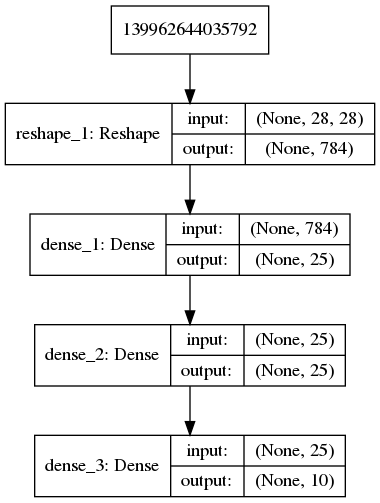

In [11]:
plot_model(model, os.path.join(paths['model'], 'model.png'),
          show_shapes=True)
display(Image(filename=os.path.join(paths['model'], 'model.png')))

## Model evaluation

Loading model

In [9]:
json_file = open(os.path.join(paths['model'],'model.json'), 'r')
loaded_model_json = json_file.read()
model = model_from_json(loaded_model_json)
json_file.close()
model.load_weights(os.path.join(paths['model'], 'weights.hdf5'))

Evaluating model on test set

In [10]:
prediction = np.argmax(model.predict(data['x_test'], batch_size=hyperparameters['batch_size']), axis=-1)

Computing and displaying confusion matrix

In [11]:
confusion = confusion_matrix(data['y_test'].tolist(), prediction.tolist())
print(f1_score(data['y_test'].tolist(), prediction.tolist(), average='weighted'))
trace = go.Heatmap(z=confusion)
data=[trace]
layout = go.Layout(
    title='Confusion matrix',
    xaxis = dict(ticks='', nticks=10),
    yaxis = dict(ticks='', nticks=10)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Confusion')
pio.write_image(fig, os.path.join(paths['model/stats'], 'confusion_matrix.png'))

0.9019158721418403
